In [1]:
import os
import pandas as pd

from procyon.data.data_utils import DATA_DIR

## PD Analysis (Figure 6)

In [2]:
# Excel file with Vik's feedback:
xl_file = pd.read_excel(os.path.join(DATA_DIR, "experimental_data/PD_uncharacterized/PD_caption_clusters.xlsx"), sheet_name=1)
# GO relations:
go_relations = pd.read_csv(DATA_DIR + "integrated_data/v1/protein_go/sample_aware_ontology_go_centric/protein_go_relations_indexed.unified.csv")
# GO terms to indices:
go_map = pd.read_pickle(DATA_DIR + "integrated_data/v1/go/go_info_filtered.pkl")

In [3]:
xl_file = xl_file[["GO TERM mappping to pathway", "Summary Pathway", "NEW SCALE", "Total Size"]].rename(
    columns={"GO TERM mappping to pathway": "go_term", "Summary Pathway": "pathway", "NEW SCALE":"scale", "Total Size": "total_size"})


In [4]:
xl_file

,go_term,pathway,scale,total_size
0,GO:0043161: proteasome-mediated ubiquitin-depe...,Ubiquitin-proteasome system,3.0,14.0
1,GO:0006397: mRNA processing,mRNA maturation and translation,3.0,7.0
2,GO:2000142: regulation of DNA-templated transc...,Transcriptional initiation,1.0,7.0
3,GO:0140694: non-membrane-bounded organelle ass...,Non-membrane bound organelle assembly (cytoske...,3.0,5.0
4,GO:0016192: vesicle-mediated transport,Intracellular vesicle trafficking,3.0,8.0
5,GO:0004672: protein kinase activity,Protein kinase activity,2.0,4.0
6,GO:0040029: epigenetic regulation of gene expr...,Histone acetylation,1.0,3.0
7,GO:1901987: regulation of cell cycle phase tra...,Cell cycle phase transition and checkpoint reg...,2.0,8.0
8,GO:0045893: positive regulation of DNA-templat...,Transcriptional activation,1.0,5.0
9,GO:0008283: cell population proliferation,Cell proliferation,2.0,5.0


In [5]:
go_terms = [":".join(s.split(":")[:2]) for s in xl_file["go_term"].loc[xl_file["go_term"].notna()]]
gterm_map = {":".join(s.split(":")[:2]): s.split(":")[-1][1:] for s in xl_file["go_term"].loc[xl_file["go_term"].notna()]}
gterm_map

{'GO:0043161': 'proteasome-mediated ubiquitin-dependent protein catabolic process',
 'GO:0006397': 'mRNA processing',
 'GO:2000142': 'regulation of DNA-templated transcription initiation',
 'GO:0140694': 'non-membrane-bounded organelle assembly',
 'GO:0016192': 'vesicle-mediated transport',
 'GO:0004672': 'protein kinase activity',
 'GO:0040029': 'epigenetic regulation of gene expression',
 'GO:1901987': 'regulation of cell cycle phase transition',
 'GO:0045893': 'positive regulation of DNA-templated transcription',
 'GO:0008283': 'cell population proliferation',
 'GO:0010038': 'response to metal ion',
 'GO:0006338': 'chromatin remodeling',
 'GO:0051726': 'regulation of cell cycle',
 'GO:0051056': 'regulation of small GTPase mediated signal transduction',
 'GO:0030259': 'lipid glycosylation',
 'GO:0006355': 'regulation of DNA-templated transcription',
 'GO:0007283': 'spermatogenesis',
 'GO:0006796': 'phosphate-containing compound metabolic process',
 'GO:0009952': 'anterior/posterior p

In [6]:
dfexp = pd.read_csv("/n/holylfs06/LABS/mzitnik_lab/Lab/PLM/REPRO/ProCyon-Instruct/experimental_data/PD_uncharacterized/pd_go_assocs_desc_aware_EXP_QuickGO_all.csv")

In [7]:
vc = dfexp["parent_go_id_of_interest"].value_counts()
vc

parent_go_id_of_interest
GO:0006355    5576
GO:0045893    2856
GO:0006796    2042
GO:0006629    1707
GO:0004672    1641
GO:0051726    1214
GO:0016192    1133
GO:0006338    1081
GO:0007186    1048
GO:0043161    1004
GO:0007169     642
GO:0006397     577
GO:1901987     561
GO:0009117     554
GO:0006366     466
GO:0140694     448
GO:0006979     411
GO:0010038     177
GO:0040029     166
GO:0008283     140
GO:0007041     112
GO:0007179     108
GO:0007006     102
GO:0051056      98
GO:0006888      91
GO:0007283      78
GO:2000142      47
GO:0015867      31
GO:0038084      31
GO:0098930      14
GO:0085029      13
GO:0009952       9
GO:2000479       7
GO:0030259       5
GO:0044784       3
GO:0044341       2
Name: count, dtype: int64

In [8]:
# Mask for genes:
go_ids = vc.index[vc > 10]
dfexp = dfexp.loc[dfexp["parent_go_id_of_interest"].isin(go_ids),:]
dfexp

,protein_id,go_id,relation,gene_name,parent_go_id_of_interest
0,A7E2V4,GO:0043161,involved_in,ZSWIM8,GO:0043161
1,O00308,GO:0043161,involved_in,WWP2,GO:0043161
2,O00762,GO:0031145,involved_in,UBE2C,GO:0043161
3,O00762,GO:0031145,involved_in,UBE2C,GO:0043161
4,O00762,GO:0043161,involved_in,UBE2C,GO:0043161
...,...,...,...,...,...
24190,Q9Y6K1,GO:0044027,involved_in,DNMT3A,GO:0040029
24191,Q9Y6K1,GO:0044027,involved_in,DNMT3A,GO:0040029
24192,Q9Y6K1,GO:0044027,involved_in,DNMT3A,GO:0040029
24193,Q9Y6X9,GO:0045814,involved_in,MORC2,GO:0040029


In [9]:
# Remove duplicates
dfexp = dfexp.drop_duplicates(["parent_go_id_of_interest", "protein_id"])

In [10]:
for g in vc.index:
    d = gterm_map[g]
    print(d)

regulation of DNA-templated transcription
positive regulation of DNA-templated transcription
phosphate-containing compound metabolic process
lipid metabolic process
protein kinase activity
regulation of cell cycle
vesicle-mediated transport
chromatin remodeling
G protein-coupled receptor signaling pathway
proteasome-mediated ubiquitin-dependent protein catabolic process
cell surface receptor protein tyrosine kinase signaling pathway
mRNA processing
regulation of cell cycle phase transition
nucleotide metabolic process
transcription by RNA polymerase II
non-membrane-bounded organelle assembly
response to oxidative stress
response to metal ion
epigenetic regulation of gene expression
cell population proliferation
lysosomal transport
transforming growth factor beta receptor signaling pathway
mitochondrial membrane organization
regulation of small GTPase mediated signal transduction
endoplasmic reticulum to Golgi vesicle-mediated transport
spermatogenesis
regulation of DNA-templated transc

In [11]:
# Load control lists:
ctrl_lists = {}
for gname in ["pd_gwas", "general", "neuro"]:
    if gname == 'pd_gwas':
        control_df = pd.read_csv(os.path.join(DATA_DIR, "experimental_data/PD_uncharacterized/", "gene_lists/pd_assoc_uid.csv"))["uniprot_id"].tolist()
    else:
        control_df = pd.read_csv(os.path.join(DATA_DIR, "experimental_data/PD_uncharacterized/", "gene_lists/{}_control_genes.csv".format(gname)))["uniprot_id"].tolist()
    ctrl_lists[gname] = control_df

In [12]:
import numpy as np

In [13]:
def random_sample_set(gene_list, generator, sample_size = 100):
    inds = generator.choice(np.arange(len(gene_list)), size=sample_size, replace=False)
    return [gene_list[i] for i in inds]

In [14]:
# Calc sample size:
potential_sample_sizes = []
for k, v in ctrl_lists.items():
    potential_sample_sizes.append((k, len(v)))
size = sorted(potential_sample_sizes, key=lambda x: x[1])[0]
min_key, min_size = size
print(min_key, min_size)

pd_gwas 962


In [15]:
# Count numbers for each pathway:
import tqdm

n_samples = 30

generator = np.random.default_rng(12071999)

unique_go_terms = dfexp["parent_go_id_of_interest"].unique()
counts_by_ctrl = {k:[] for k in ctrl_lists.keys()}
sig_tests_by_ctrl = {k:[] for k in ctrl_lists.keys()}

for go_term in tqdm.tqdm(unique_go_terms):
    sub_df = dfexp.loc[dfexp["parent_go_id_of_interest"] == go_term,:]
    for k in ctrl_lists.keys():
        if k != min_key:
            # Perturb:
            count_by_genes = []
            for i in range(n_samples):
                ctrl_gene_list = random_sample_set(ctrl_lists[k], generator=generator, sample_size=min_size)
                count_by_genes.append(np.sum([(sub_df["protein_id"] == g).sum() for g in ctrl_gene_list]))

            counts_by_ctrl[k].append(np.median(count_by_genes)) # Mean of means
        else:
            ctrl_gene_list = ctrl_lists[k]
            count_by_genes = np.sum([(sub_df["protein_id"] == g).sum() for g in ctrl_gene_list])
            counts_by_ctrl[k].append(count_by_genes)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [01:02<00:00,  2.01s/it]


In [16]:
from statsmodels.stats.proportion import proportions_ztest

test_results_pd_v_general = []
test_results_pd_v_neuro = []
for i, go_term in enumerate(unique_go_terms):
    count_by_k = []
    nobs_by_k = []
    for k in ["pd_gwas", "general"]:
        ctrl_gene_list = ctrl_lists[k]
        nobs_by_k.append((dfexp["parent_go_id_of_interest"] == go_term).sum())
        sub_df = dfexp.loc[dfexp["parent_go_id_of_interest"] == go_term,:]
        # Inner term of below will be 0 or 1
        count_by_genes = counts_by_ctrl[k][i]
        count_by_k.append(count_by_genes)
    stat, pval = proportions_ztest(count_by_k, nobs_by_k, alternative = "larger")
    test_results_pd_v_general.append(pval)

    count_by_k = []
    nobs_by_k = []
    for k in ["pd_gwas", "neuro"]:
        ctrl_gene_list = ctrl_lists[k]
        nobs_by_k.append((dfexp["parent_go_id_of_interest"] == go_term).sum())
        sub_df = dfexp.loc[dfexp["parent_go_id_of_interest"] == go_term,:]
        # Inner term of below will be 0 or 1
        count_by_genes = counts_by_ctrl[k][i]
        count_by_k.append(count_by_genes)
    stat, pval = proportions_ztest(count_by_k, nobs_by_k, alternative = "larger")
    test_results_pd_v_neuro.append(pval)

/n/home06/oqueen/.conda/envs/ProCyon/lib/python3.11/site-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


In [17]:
xl_file_upd = xl_file.loc[xl_file["go_term"].notna(),:]
xl_file_upd["go_term_only"] = [":".join(s.split(":")[:2]) for s in xl_file_upd["go_term"]]
xl_file_upd

/tmp/ipykernel_3864218/922153170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xl_file_upd["go_term_only"] = [":".join(s.split(":")[:2]) for s in xl_file_upd["go_term"]]


,go_term,pathway,scale,total_size,go_term_only
0,GO:0043161: proteasome-mediated ubiquitin-depe...,Ubiquitin-proteasome system,3.0,14.0,GO:0043161
1,GO:0006397: mRNA processing,mRNA maturation and translation,3.0,7.0,GO:0006397
2,GO:2000142: regulation of DNA-templated transc...,Transcriptional initiation,1.0,7.0,GO:2000142
3,GO:0140694: non-membrane-bounded organelle ass...,Non-membrane bound organelle assembly (cytoske...,3.0,5.0,GO:0140694
4,GO:0016192: vesicle-mediated transport,Intracellular vesicle trafficking,3.0,8.0,GO:0016192
5,GO:0004672: protein kinase activity,Protein kinase activity,2.0,4.0,GO:0004672
6,GO:0040029: epigenetic regulation of gene expr...,Histone acetylation,1.0,3.0,GO:0040029
7,GO:1901987: regulation of cell cycle phase tra...,Cell cycle phase transition and checkpoint reg...,2.0,8.0,GO:1901987
8,GO:0045893: positive regulation of DNA-templat...,Transcriptional activation,1.0,5.0,GO:0045893
9,GO:0008283: cell population proliferation,Cell proliferation,2.0,5.0,GO:0008283


In [18]:
sorted_go_inds = [np.where((xl_file_upd["go_term_only"] == gt).to_numpy())[0][0] for gt in unique_go_terms]
scale_val = xl_file_upd["scale"].iloc[sorted_go_inds].to_numpy()
scale_val

array([3., 3., 1., 3., 3., 2., 2., 1., 2., 2., 1., 2., 3., 1., 0., 2., 3.,
       1., 3., 2., 2., 3., 3., 1., 1., 3., 3., 3., 3., 2., 1.])

In [19]:
size = xl_file_upd["total_size"].iloc[sorted_go_inds].to_numpy()

In [20]:
gt_size = []
for go_term in unique_go_terms:
    sub_df = dfexp.loc[dfexp["parent_go_id_of_interest"] == go_term,:]
    gt_size.append(sub_df.shape[0])

gt_stack = np.repeat(np.array([gt_size]), 4, axis=0)
gt_stack.shape

(4, 31)

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

klist = list(counts_by_ctrl.keys())
klist = [klist[i] for i in [0,2,1]]
hm = np.stack([counts_by_ctrl[k] for k in klist],axis=0)
klist = klist
hm = hm / gt_stack[1:,:]
sorted_ids = np.flip(np.argsort(scale_val / 3.0))
hm = hm[:,sorted_ids]

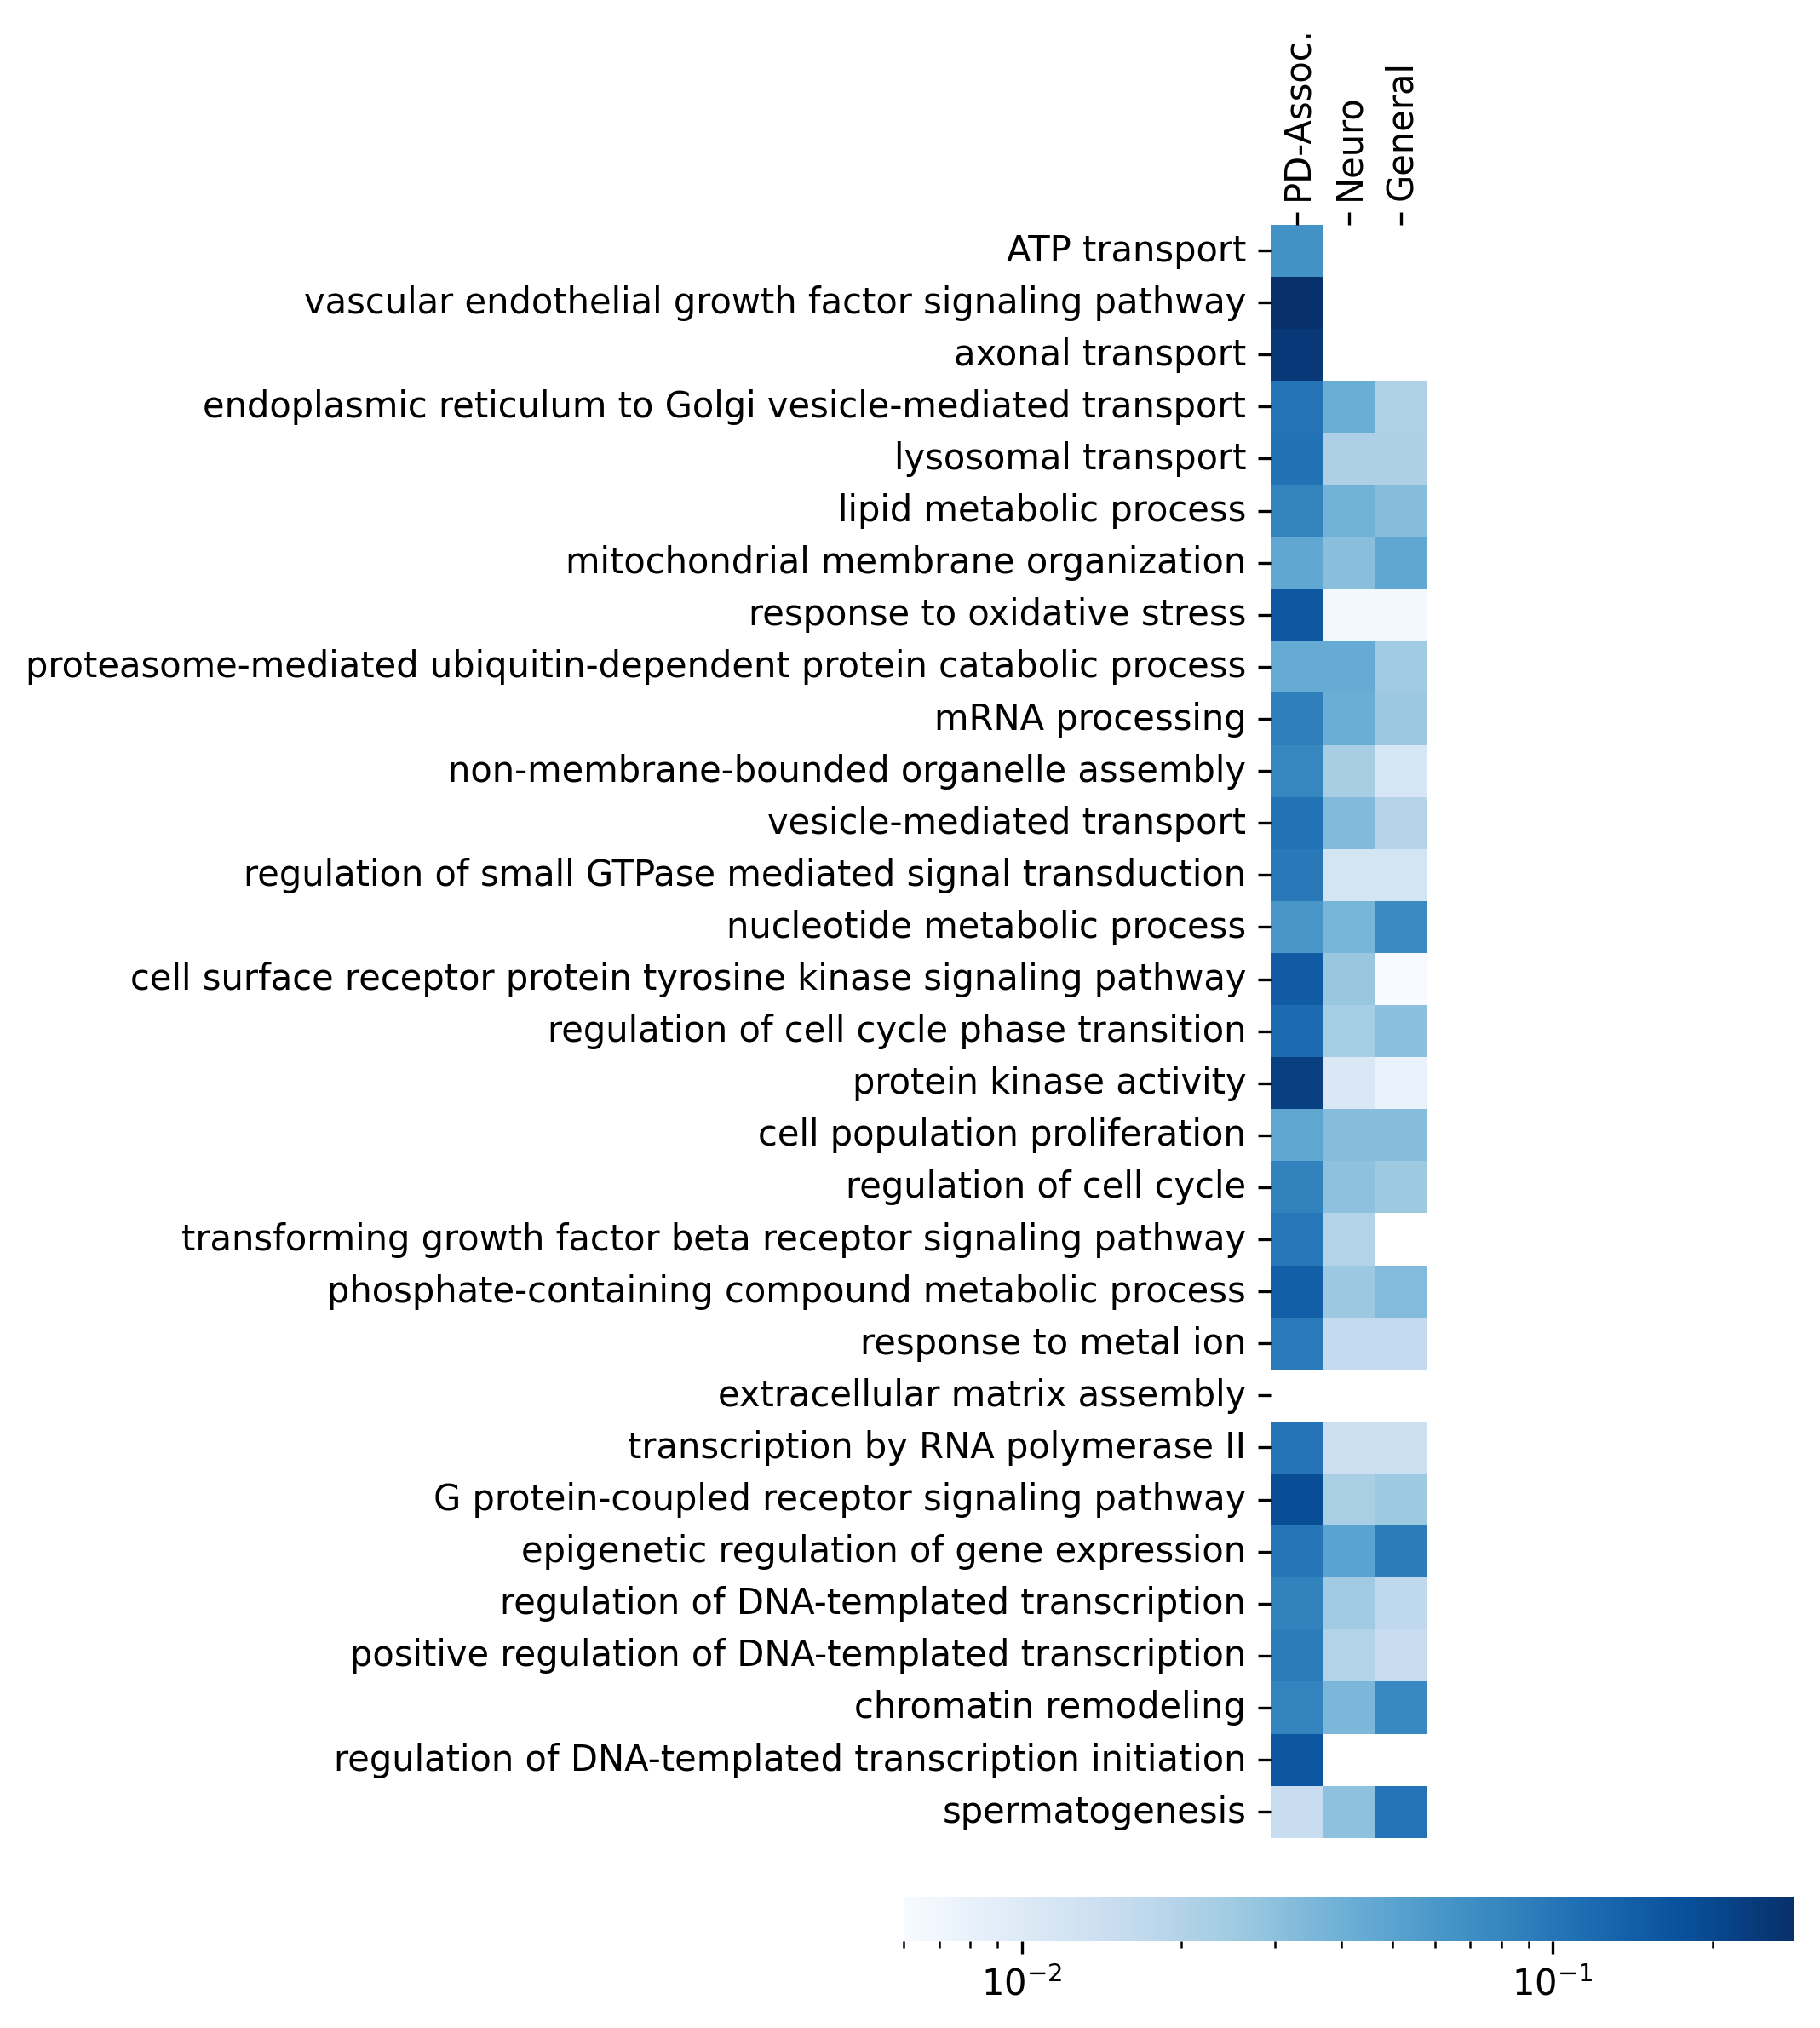

In [22]:
fig,ax = plt.subplots(1, 1, figsize=(3,10),dpi=300, sharey=True)

cmap = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(np.transpose(hm), square=True,cmap=cmap, norm = LogNorm(),
            cbar_kws={"orientation":"horizontal", "pad":0.03, 'shrink': 1.5}, ax=ax)
ax.set_xticks(np.arange(len(klist))+0.5, ["PD-Assoc.", "Neuro", "General"], rotation=90)
ax.set_yticks(np.arange(len(unique_go_terms))+0.5, [gterm_map[unique_go_terms[i]] for i in sorted_ids], rotation=0)
ax.xaxis.tick_top()
plt.show()

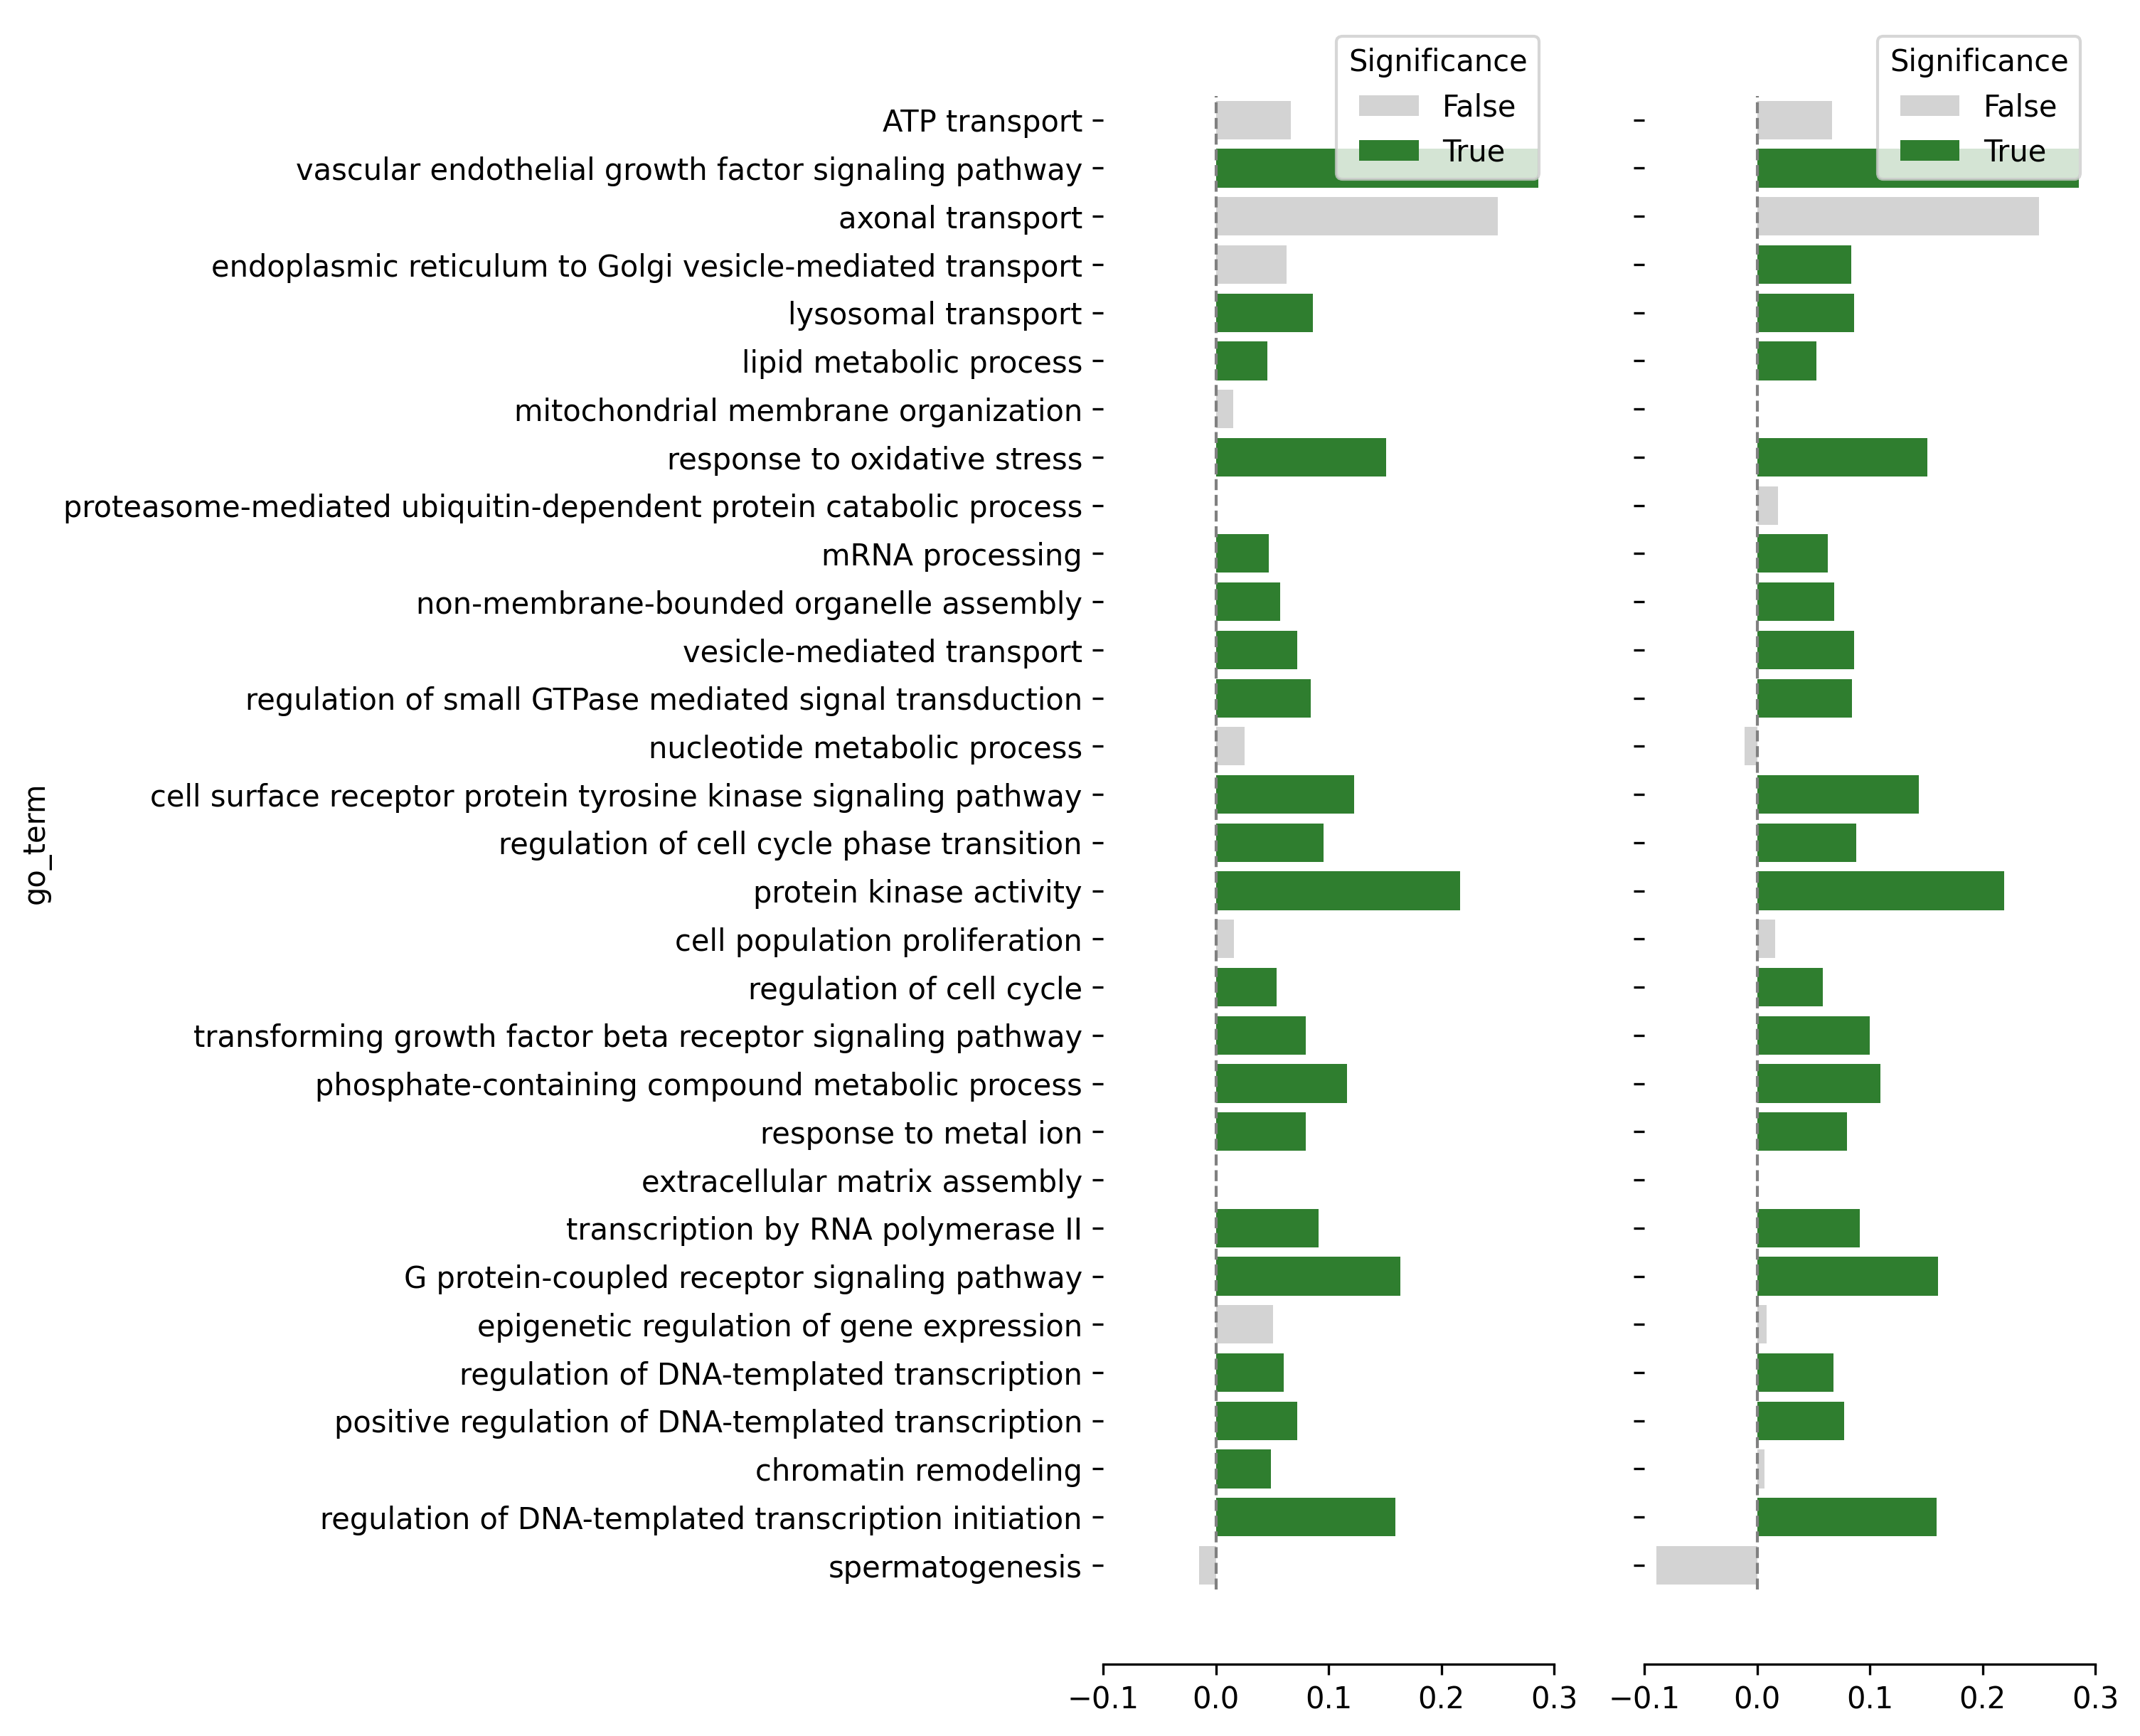

In [23]:
fig,ax = plt.subplots(1, 2, figsize=(6,10),dpi=300, sharey=True)

reordered_test_neuro = [test_results_pd_v_neuro[i] for i in sorted_ids]
pd_v_neuro = hm[0,:] - hm[1,:]
pd_v_neuro_df = pd.DataFrame({
    "val": pd_v_neuro,
    "p": reordered_test_neuro,
    "Significance": [(p < 0.05) for p in reordered_test_neuro],
    "go_term": [gterm_map[unique_go_terms[i]] for i in sorted_ids],
})

reordered_test_general = [test_results_pd_v_general[i] for i in sorted_ids]

pd_v_general = hm[0,:] - hm[2,:]
pd_v_general_df = pd.DataFrame({
    "val": pd_v_general,
    "p": reordered_test_general,
    "Significance": [(p < 0.05) for p in reordered_test_general],
    "go_term": [gterm_map[unique_go_terms[i]] for i in sorted_ids],
})

sns.barplot(pd_v_neuro_df, x="val", y="go_term", hue="Significance", orient="h", ax=ax[0],
            palette=['lightgray', 'forestgreen'])
ax[0].vlines(0.0, *ax[0].get_ylim(), color = "grey", linestyle="--", linewidth=1)
sns.despine(ax=ax[0], left=True, bottom=False)

ax[0].set_xlim([-0.1, 0.3])
ax[0].set_xlabel("")


sns.barplot(pd_v_general_df, x="val", y="go_term", hue="Significance", orient="h", ax=ax[1],
            palette=['lightgray', 'forestgreen'])
sns.despine(ax=ax[1], left=True, bottom=False)
ax[1].vlines(0.0, *ax[1].get_ylim(), color = "grey", linestyle="--", linewidth=1)
ax[1].set_xlim([-0.1, 0.3])
ax[1].set_xlabel("")
plt.show()

In [24]:
for sv in np.unique(scale_val):
    mask = ((scale_val)[sorted_ids] == sv)
    neuro_count = pd_v_neuro_df["Significance"].loc[mask].sum()
    general_count = pd_v_general_df["Significance"].loc[mask].sum()
    print("{}".format(sv))
    print("Total: {}".format(mask.sum()))
    print("Neuro: {}".format(neuro_count))
    print("General: {}".format(general_count))
    print("")

0.0
Total: 1
Neuro: 0
General: 0

1.0
Total: 8
Neuro: 6
General: 5

2.0
Total: 9
Neuro: 7
General: 7

3.0
Total: 13
Neuro: 8
General: 9

